In [1]:
import numpy as np
import pandas as pd

import pickle
import os

In [2]:
from sklearn import ensemble

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

# Load data

In [5]:
!ls ../training_data/

psl_df_cleaned.csv	       va_df_houston.csv
road_impediments_gbgeo.csv.gz  va_df_la.csv
va_df_atlanta.csv	       va_df_raleigh.csv
va_df_denver.csv	       vehicle_activity_dense_long_lat.csv.zip
va_df_durham.csv	       vehicle_activity_with_distances.csv.gz


In [6]:
cities = ['atlanta', 'denver', 'durham', 'houston', 'la', 'raleigh']

In [7]:
DATA = {}

for city in cities:
    DATA[city] = pd.read_csv(f'../training_data/va_df_{city}.csv')

In [8]:
display(DATA['la'].head(2))
print(DATA['la'].shape)

,Unnamed: 0,geohash,lat,long,city,average_idle_total,median_idle_total,cumulative_daily_idle_total,average_park_time,average_park_time_ratio,total_searching,percent_searching
0,0,9q5cu0z,34.06,-118.29,Los Angeles,7.2526,5.9167,75.0995,6.3136,1.4596,11.0,0.0940
1,1,9q5cf6b,34.07,-118.38,Los Angeles,8.2758,7.1667,119.3317,6.2867,1.7713,5.0,0.0568


(18302, 12)


## `road_impediments_gbgeo`

In [9]:
road_impediments_gbgeo = pd.read_csv('../training_data/road_impediments_gbgeo.csv.gz')

In [10]:
road_impediments_gbgeo.columns

Index(['Unnamed: 0', 'geohash', 'average_acceleration-min',
       'average_acceleration-max', 'average_acceleration-mean',
       'average_acceleration-median', 'percent_vehicles_acceleration-min',
       'percent_vehicles_acceleration-max',
       'percent_vehicles_acceleration-mean',
       'percent_vehicles_acceleration-median', 'average_monthly_vehicles-min',
       'average_monthly_vehicles-max', 'average_monthly_vehicles-mean',
       'average_monthly_vehicles-median', 'percent_car-min', 'percent_car-max',
       'percent_car-mean', 'percent_car-median', 'percent_mpv-min',
       'percent_mpv-max', 'percent_mpv-mean', 'percent_mpv-median',
       'percent_ldt-min', 'percent_ldt-max', 'percent_ldt-mean',
       'percent_ldt-median', 'percent_mdt-min', 'percent_mdt-max',
       'percent_mdt-mean', 'percent_mdt-median', 'percent_hdt-min',
       'percent_hdt-max', 'percent_hdt-mean', 'percent_hdt-median',
       'percent_other-min', 'percent_other-max', 'percent_other-mean',
      

In [11]:
road_impediments_gbgeo_columns = [ 'average_acceleration-min',
       'average_acceleration-max', 'average_acceleration-mean',
       'average_acceleration-median', 'percent_vehicles_acceleration-min',
       'percent_vehicles_acceleration-max',
       'percent_vehicles_acceleration-mean',
       'percent_vehicles_acceleration-median', 'average_monthly_vehicles-min',
       'average_monthly_vehicles-max', 'average_monthly_vehicles-mean',
       'average_monthly_vehicles-median', 'percent_car-min', 'percent_car-max',
       'percent_car-mean', 'percent_car-median', 'percent_mpv-min',
       'percent_mpv-max', 'percent_mpv-mean', 'percent_mpv-median',
       'percent_ldt-min', 'percent_ldt-max', 'percent_ldt-mean',
       'percent_ldt-median', 'percent_mdt-min', 'percent_mdt-max',
       'percent_mdt-mean', 'percent_mdt-median', 'percent_hdt-min',
       'percent_hdt-max', 'percent_hdt-mean', 'percent_hdt-median',
       'percent_other-min', 'percent_other-max', 'percent_other-mean',
       'percent_other-median',
]

## `vehicle_activity_with_distances`

In [12]:
vehicle_activity_with_distances = pd.read_csv('../training_data/vehicle_activity_with_distances.csv.gz')

/home/strokach/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
display(vehicle_activity_with_distances.head(2))
print(vehicle_activity_with_distances.shape)
print(len(set(vehicle_activity_with_distances['geohash'])))

,Unnamed: 0,geohash,city,county,state,metro,average_idle_total,median_idle_total,cumulative_daily_idle_total,average_idle_car,...,hospital_k5,sports_venue_k1,sports_venue_k3,sports_venue_k5,church_k1,church_k3,church_k5,school_k1,school_k3,school_k5
0,21,9q5cu0z,Los Angeles,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",7.2526,5.9167,75.0995,8.1452,...,1.858249,2.820807,4.040846,6.344712,0.815988,2.311438,4.060180,0.346995,0.409768,0.446790
1,57,9q5cf6b,Los Angeles,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",8.2758,7.1667,119.3317,5.5510,...,2.368051,6.152981,9.133728,10.011422,2.129068,3.572366,5.162235,1.296467,1.527772,1.772008


(78439, 75)
78439


In [14]:
vehicle_activity_with_distances.columns

Index(['Unnamed: 0', 'geohash', 'city', 'county', 'state', 'metro',
       'average_idle_total', 'median_idle_total',
       'cumulative_daily_idle_total', 'average_idle_car', 'average_idle_mpv',
       'average_idle_ldt', 'average_idle_mdt', 'average_idle_hdt',
       'hourly_distribution_idle', 'percent_car_idle', 'percent_mpv_idle',
       'percent_ldt_idle', 'percent_mdt_idle', 'percent_hdt_idle',
       'percent_other_idle', 'percent_gas_idle', 'percent_diesel_idle',
       'percent_other_engine_idle', 'average_latitude_park',
       'average_longitude_park', 'average_park_time',
       'average_park_time_ratio', 'total_searching', 'percent_searching',
       'average_unique_geohashes', 'average_total_geohashes',
       'circling_distribution', 'hourly_distribution_park', 'percent_car_park',
       'percent_mpv_park', 'percent_ldt_park', 'percent_mdt_park',
       'percent_hdt_park', 'percent_other_park', 'latitude', 'longitude',
       'closest_fuel_station_k1', 'closest_fuel_sta

In [15]:
vehicle_activity_with_distances_columns = [
    'closest_fuel_station_k1', 'closest_fuel_station_k3',
       'closest_fuel_station_k5', 'cell_coverage_dark_spot_k1',
       'cell_coverage_dark_spot_k3', 'cell_coverage_dark_spot_k5',
       'heavy_duty_parking_k1', 'heavy_duty_parking_k3',
       'heavy_duty_parking_k5', 'service_center_metrics_k1',
       'service_center_metrics_k3', 'service_center_metrics_k5',
       'public_services_locations_k1', 'public_services_locations_k3',
       'public_services_locations_k5', 'cell_structure_k1',
       'cell_structure_k3', 'cell_structure_k5', 'college_k1', 'college_k3',
       'college_k5', 'hospital_k1', 'hospital_k3', 'hospital_k5',
       'sports_venue_k1', 'sports_venue_k3', 'sports_venue_k5', 'church_k1',
       'church_k3', 'church_k5', 'school_k1', 'school_k3', 'school_k5',
    
]

# Train model for city

In [16]:
n_estimators = 100

In [17]:
data = (
    DATA['la']
    .merge(road_impediments_gbgeo[['geohash'] + road_impediments_gbgeo_columns], on=['geohash'], how='left')
    .merge(vehicle_activity_with_distances[['geohash'] + vehicle_activity_with_distances_columns], on=['geohash'])
)

In [18]:
assert len(data) == len(DATA['la'])

In [19]:
# feature_names = road_impediments_gbgeo_columns + vehicle_activity_with_distances_columns
feature_names = vehicle_activity_with_distances_columns

In [20]:
null_mask = data[feature_names + ['average_idle_total']].isnull().any(axis=1)

In [21]:
null_mask.sum()

306

In [22]:
data = data[~null_mask]

In [23]:
X = data[feature_names]

In [24]:
Y = data['average_idle_total']

In [25]:
clf = ensemble.GradientBoostingRegressor(n_estimators=n_estimators)

In [26]:
clf.fit(X, Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [27]:
with open(f'machine_learning/clf_{n_estimators}.pickle', 'wb') as fout:
    pickle.dump(clf, fout)

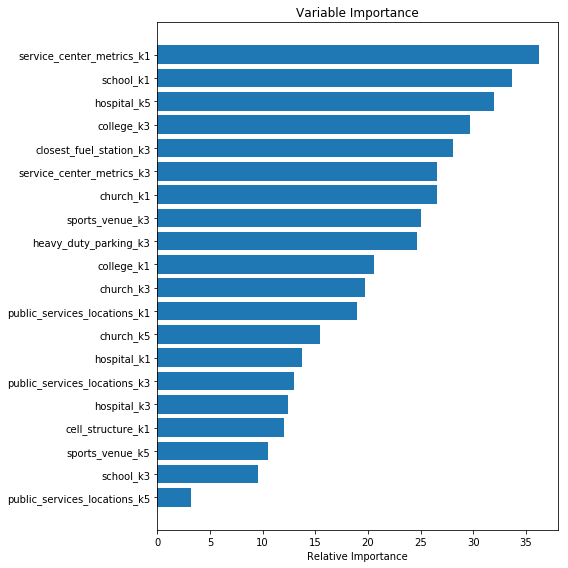

In [28]:
fg, axs = plt.subplots(figsize=(8, 8))

feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

top_k = 20
plt.barh(pos[:top_k], feature_importance[sorted_idx][:top_k], align='center')
plt.yticks(pos[:top_k], np.array(feature_names)[sorted_idx][:top_k])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.tight_layout()
plt.savefig(f'machine_learning/variable_importance_{n_estimators}.pdf', dpi=150)

In [29]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence

In [30]:
sorted_idx

array([14, 31, 26, 15, 22, 13, 21, 29, 12, 28, 18,  7, 25, 27, 10,  1, 19,
       23, 30,  9, 20,  3, 32,  8,  0,  5,  2, 24, 11, 16,  6,  4, 17])

In [31]:
feature_importance

array([  44.96871856,   28.0546607 ,   47.43351733,   38.44117962,
         69.38404409,   46.625264  ,   59.32977028,   24.63511153,
         42.35597525,   36.23785652,   26.55097082,   54.29765226,
         18.92626023,   12.93214599,    3.18176925,   11.99957185,
         56.51772868,  100.        ,   20.57399724,   29.68166275,
         37.03279174,   13.7405217 ,   12.39877716,   31.94027581,
         52.14730315,   25.0421866 ,   10.52019618,   26.52213634,
         19.71654457,   15.45596638,   33.66228008,    9.53581275,
         41.16110001])

In [32]:
import matplotlib 
matplotlib.rcParams.update({'font.size': 14})

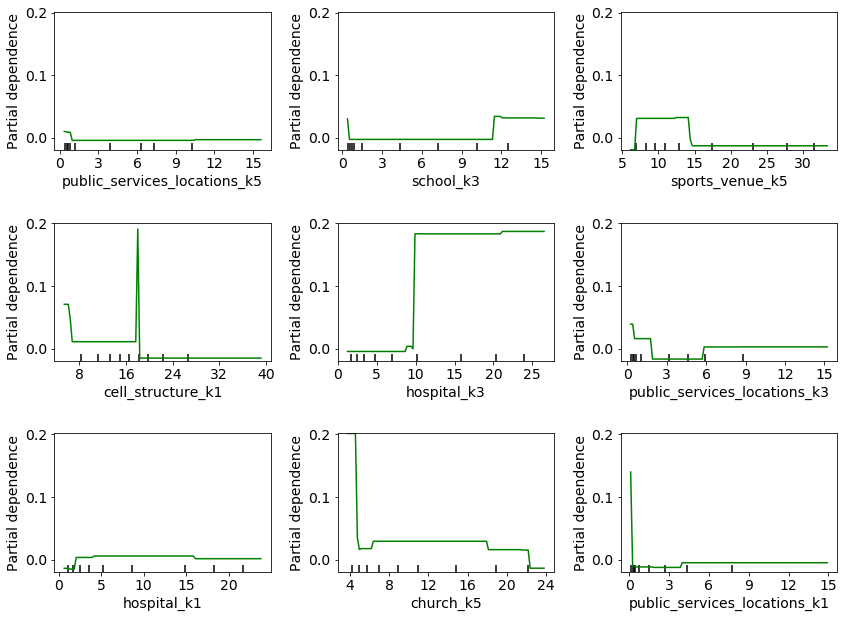

In [33]:
features = sorted_idx.tolist()[:9]

fig, axs = plot_partial_dependence(
    clf, X, features, feature_names=feature_names, n_jobs=3, grid_resolution=100, figsize=(12, 9))

plt.tight_layout()

plt.savefig(f'machine_learning/partial_dependence_{n_estimators}.pdf', dpi=150)

# Validation

In [34]:
data_valid = (
    DATA['atlanta']
    .merge(road_impediments_gbgeo[['geohash'] + road_impediments_gbgeo_columns], on=['geohash'], how='left')
    .merge(vehicle_activity_with_distances[['geohash'] + vehicle_activity_with_distances_columns], on=['geohash'])
)

In [35]:
null_mask_valid = data_valid[feature_names + ['average_idle_total']].isnull().any(axis=1)

In [36]:
null_mask_valid.sum()

48

In [37]:
data_valid = data_valid[~null_mask_valid]

In [38]:
X_valid = data_valid[feature_names]

In [39]:
Y_valid = data_valid['average_idle_total']

In [40]:
Y_valid_pred = clf.predict(X_valid)

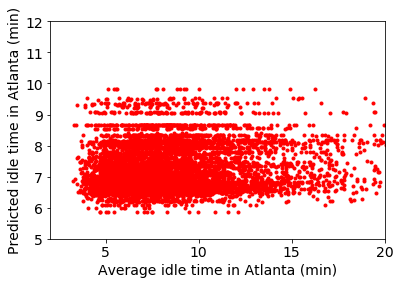

In [41]:
plt.plot(Y_valid, Y_valid_pred, 'r.')
plt.xlim(2, 20)
plt.ylim(5, 12)

plt.xlabel('Average idle time in Atlanta (min)')
plt.ylabel('Predicted idle time in Atlanta (min)')

plt.savefig(f'machine_learning/validation_set_performance_{n_estimators}.pdf', dpi=150)

In [42]:
import scipy as sp

In [43]:
sp.stats.spearmanr(Y_valid, Y_valid_pred)

SpearmanrResult(correlation=0.10466940255291798, pvalue=2.6897487635427393e-18)